In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import HuberRegressor, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error as MAE, r2_score as R2
import warnings
warnings.filterwarnings('ignore')

from colorama import Fore
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', '{:.3f}'.format)

In [112]:
df = pd.read_csv('data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15000.0,7499.500000,4330.271354,0.000000,3749.750000,7499.500000,11249.250000,14999.000000
Row#,15000.0,427.577533,214.127422,0.000000,247.000000,469.000000,598.000000,777.000000
clonesize,15000.0,19.773500,6.644451,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15000.0,0.388500,0.390162,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15000.0,0.284573,0.058855,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15000.0,0.486751,0.147560,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15000.0,0.591612,0.144194,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15000.0,82.245667,9.104125,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15000.0,49.719033,5.519865,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15000.0,68.717353,7.606632,56.800000,64.700000,71.900000,71.900000,79.000000


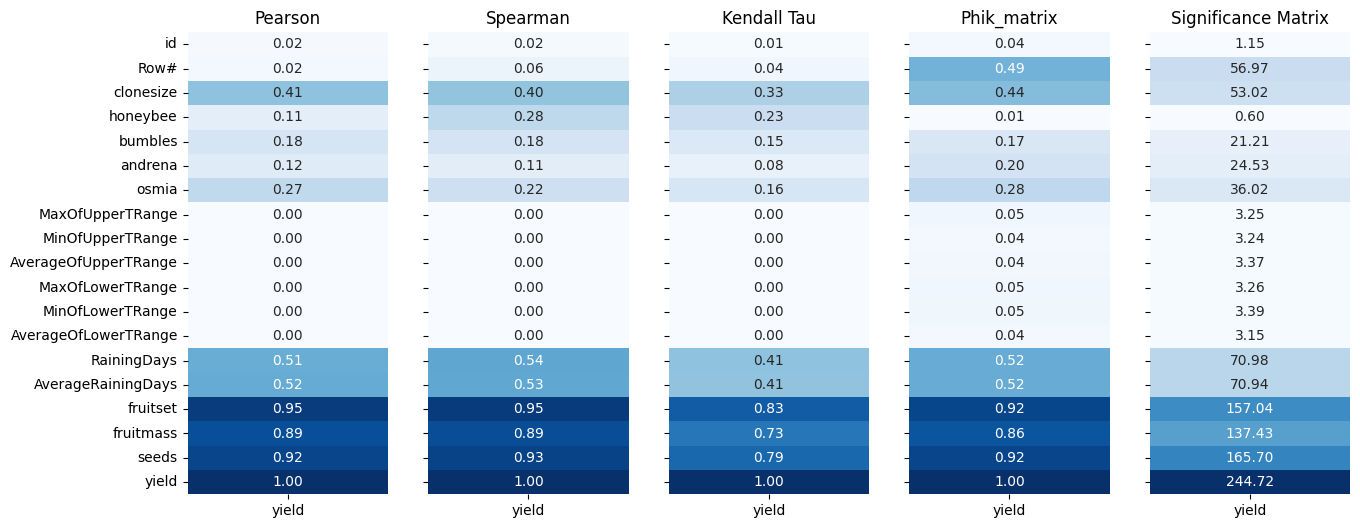

In [ ]:
sign_matrix = df.significance_matrix(interval_cols=df.columns.to_list())
a = df.phik_matrix(interval_cols=df.columns)['yield']
p_corr = df.corr(method='pearson')['yield'].to_frame()
s_corr = df.corr(method='spearman')['yield'].to_frame()
k_corr = df.corr(method='kendall')['yield'].to_frame()


fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(1, 5, figsize=(15, 6), sharey=True)

sns.heatmap(p_corr.abs(), cmap='Blues', annot=True, fmt='.2f', ax=ax1, cbar=False)
ax1.set_title('Pearson')

sns.heatmap(s_corr.abs(), cmap='Blues', annot=True, fmt='.2f', ax=ax2, cbar=False)
ax2.set_title('Spearman')

sns.heatmap(k_corr.abs(), cmap='Blues', annot=True, fmt='.2f', ax=ax3, cbar=False)
ax3.set_title('Kendall Tau')

sns.heatmap(a.to_frame(), cmap='Blues', cbar=False, fmt='.2f', annot=True, ax=ax4)
ax4.set_title('Phik_matrix')

sns.heatmap(sign_matrix[['yield']], cmap='Blues', cbar=False, annot=True, fmt='.2f', ax=ax5)
ax5.set_title('Significance Matrix')

plt.show()

MaxOfUpperTRanege - MinOfUpperTRange
MaxOfLowerTRange - MinOfLowerTRange
(AverageOfUpperTRange + AverageOfLowerTRange) / 2
AverageRainingDays / RainingDays
RainingDays / total_days_in_period
honeybee + bumbles + andrena + osmia = Total Pollinator Activity
Total Pollinator Activity / clonesize
seeds / fruitset
fruitmass / fruitset
honeybee * AverageRainingDays
AverageOfUpperTRange * fruitmass
AverageOfUpperTRange * AverageOfUpperTRange
AverageRainingDays * AverageRainingDays
clonesize * clonesize

In [ ]:
df['Row#'] = df['Row#'].replace({0 : 1})
df['rain_intensity'] = df['AverageRainingDays'] / df['RainingDays']
df['rain_variability'] = df['RainingDays'] / df['Row#']
df['total_bees'] = df['honeybee'] + df['bumbles'] + df['andrena'] + df['osmia']
df['clone_ratio'] = df['total_bees'] / df['clonesize']
df['seed_ratio'] = df['seeds'] / df['fruitset']
df['fruitmass_per_set'] = df['fruitmass'] / df['fruitset']
df['honeybee_avgRD'] = df['honeybee'] * df['AverageRainingDays']
df['clonesize_squared'] = df['clonesize'] * df['clonesize']
df['fruitset_seeds'] = df['fruitset'] * df['seeds']
df['fruitset_seeds_fruitmass'] = df['fruitset'] + df['seeds'] + df['fruitmass']
df['sum_frs'] = (df['fruitmass'] + df['fruitset']) * df['seeds']


drop_cols = [
    'AverageOfUpperTRange', 
    'AverageOfLowerTRange', 
    'MinOfUpperTRange', 
    'MaxOfLowerTRange', 
    'MinOfLowerTRange',
    'MaxOfUpperTRange',
    'id']

df = df.drop(columns=drop_cols)

Sum: 55834.94145819731


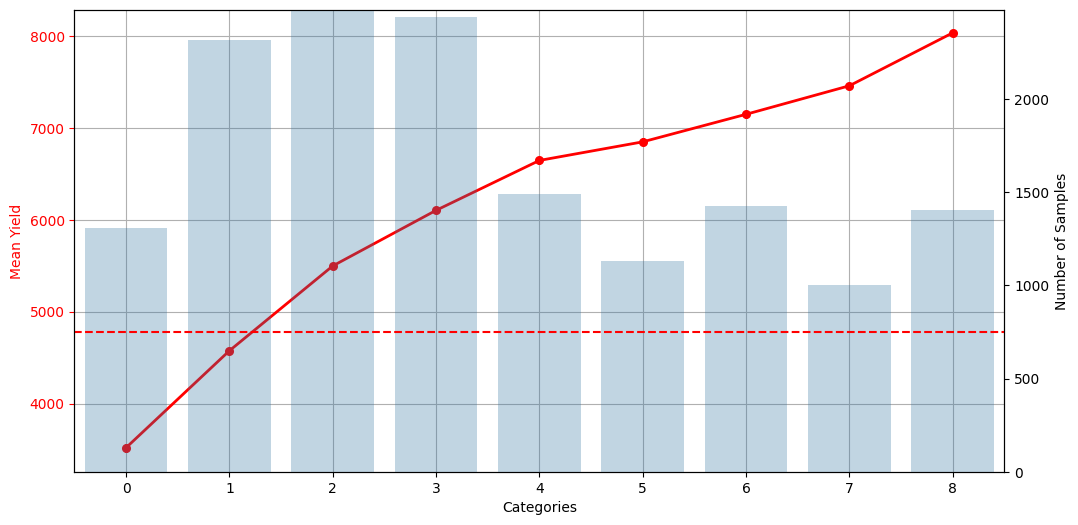

In [370]:
df['fruitset_cat'] = pd.cut(df['fruitset'], bins=[0, 0.39, 0.45, 0.49, 0.52, 0.54, 0.56, 0.583, 0.6, 1], labels=list(range(9)))
print('Sum:', df.groupby(by='fruitset_cat')['yield'].mean().sum())
counts = df['fruitset_cat'].value_counts().sort_index()
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.pointplot(data=df, x='fruitset_cat', y='yield', color='red', linewidth=2, ax=ax1)
ax2 = ax1.twinx()
ax1.set_ylabel('Mean Yield', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Categories')
sns.barplot(x=counts.index.astype(str), y=counts.values, alpha=0.3, ax=ax2, errorbar=None)
ax2.set_ylabel('Number of Samples')
ax2.set_ylim(0, counts.max())
ax2.axhline(y=int(df.shape[0]/20), color='red', linestyle='--', linewidth=1.5)
ax1.grid()
plt.show()

Sum: 53703.0371621948


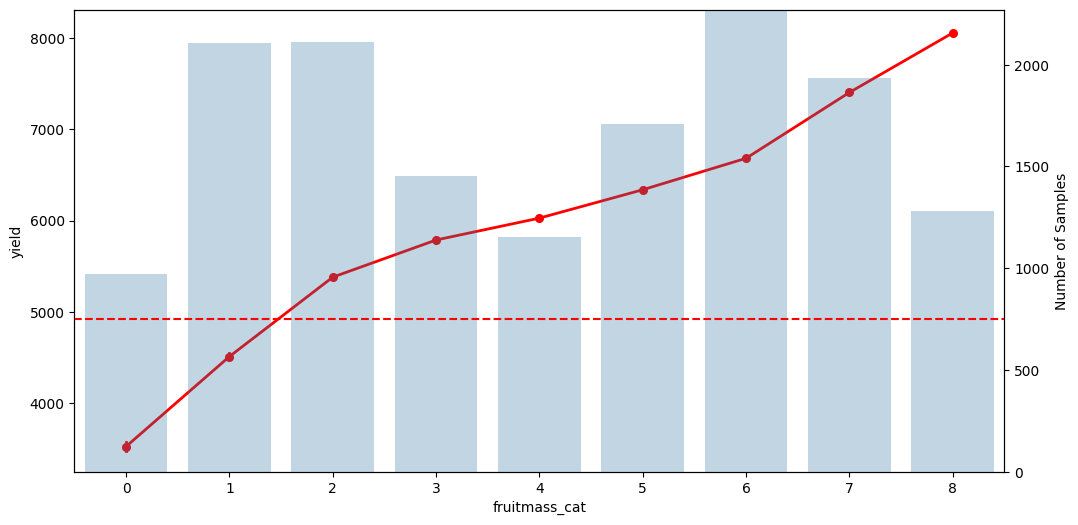

In [398]:
df['fruitmass_cat'] = pd.cut(df['fruitmass'], bins=[0.2, 0.39, 0.41, 0.43, 0.442, 0.448, 0.46, 0.48, 0.5, 0.7], labels=list(range(9)))
print('Sum:', df.groupby(by='fruitmass_cat')['yield'].mean().sum())
counts = df['fruitmass_cat'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
sns.pointplot(data=df, x='fruitmass_cat', y='yield', color='red', linewidth=2, ax=ax)
ax1.set_ylabel('Mean Yield', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Categories')
sns.barplot(x=counts.index.astype(str), y=counts.values, alpha=0.3, ax=ax2, errorbar=None)
ax2.set_ylabel('Number of Samples')
ax2.set_ylim(0, counts.max())
ax2.axhline(y=int(df.shape[0]/20), color='red', linestyle='--', linewidth=1.5)
ax1.grid()
plt.show()

Sum: 54229.98084911268


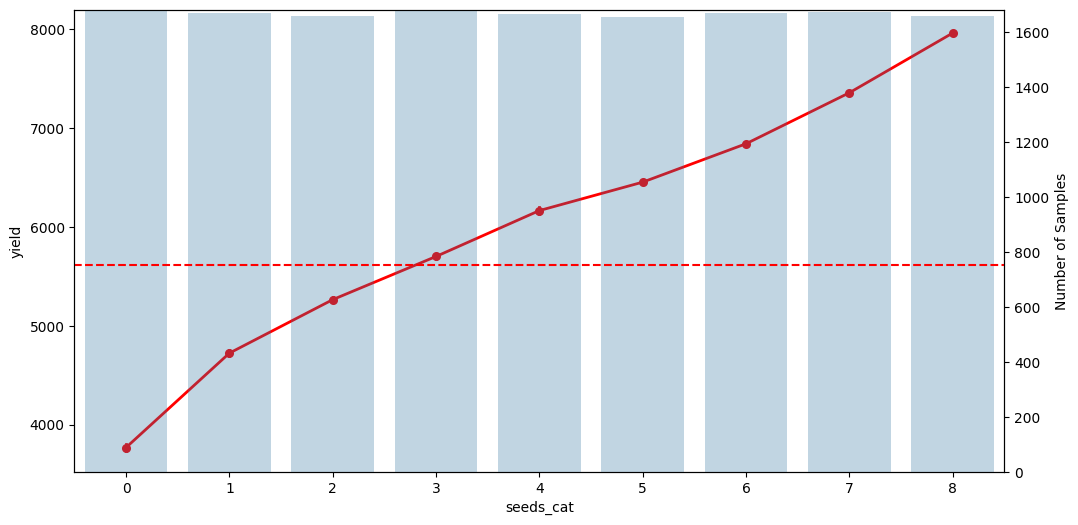

In [396]:
df['seeds_cat'] = pd.qcut(df['seeds'], q=9, labels=list(range(9)))
print('Sum:', df.groupby(by='seeds_cat')['yield'].mean().sum())
counts = df['seeds_cat'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
sns.pointplot(data=df, x='seeds_cat', y='yield', color='red', linewidth=2, ax=ax)
ax1.set_ylabel('Mean Yield', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Categories')
sns.barplot(x=counts.index.astype(str), y=counts.values, alpha=0.3, ax=ax2, errorbar=None)
ax2.set_ylabel('Number of Samples')
ax2.set_ylim(0, counts.max())
ax2.axhline(y=int(df.shape[0]/20), color='red', linestyle='--', linewidth=1.5)
ax1.grid()
plt.show()

In [413]:
global_mean = df['yield'].mean()
alpha = 10
category_stats = df.groupby('fruitset_cat')['yield'].agg(['mean', 'count'])
category_stats['smoothed'] = (category_stats['mean'] * category_stats['count'] + global_mean * alpha) / (category_stats['count'] + alpha)
df['fruitset_encoded_smoothed'] = df['fruitset_cat'].map(category_stats['smoothed'])

alpha = 0.1
category_stats = df.groupby('seeds_cat')['yield'].agg(['mean', 'count'])
category_stats['smoothed'] = (category_stats['mean'] * category_stats['count'] + global_mean * alpha) / (category_stats['count'] + alpha)
df['seeds_encoded_smoothed'] = df['seeds_cat'].map(category_stats['smoothed'])

target_means = df.groupby('fruitmass_cat')['yield'].mean()
df['fruitmass_encoded'] = df['fruitmass_cat'].map(target_means)

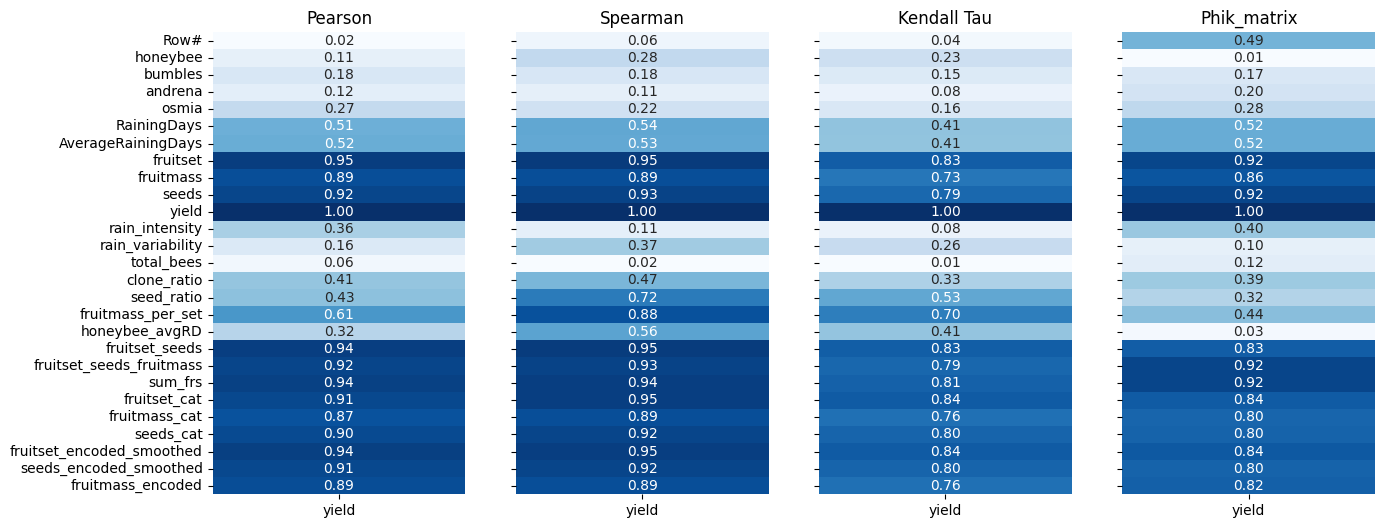

In [414]:
# sign_matrix = df.significance_matrix(interval_cols=df.columns.to_list())['yield'].to_frame()
a = df.phik_matrix(interval_cols=df.columns)['yield'].to_frame()
p_corr = df.corr(method='pearson')['yield'].to_frame()
s_corr = df.corr(method='spearman')['yield'].to_frame()
k_corr = df.corr(method='kendall')['yield'].to_frame()


fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, figsize=(15, 6), sharey=True)

sns.heatmap(p_corr.abs(), cmap='Blues', annot=True, fmt='.2f', ax=ax1, cbar=False)
ax1.set_title('Pearson')

sns.heatmap(s_corr.abs(), cmap='Blues', annot=True, fmt='.2f', ax=ax2, cbar=False)
ax2.set_title('Spearman')

sns.heatmap(k_corr.abs(), cmap='Blues', annot=True, fmt='.2f', ax=ax3, cbar=False)
ax3.set_title('Kendall Tau')

sns.heatmap(a, cmap='Blues', cbar=False, fmt='.2f', annot=True, ax=ax4)
ax4.set_title('Phik_matrix')

# sns.heatmap(sign_matrix, cmap='Blues', cbar=False, annot=True, fmt='.2f', ax=ax5)
# ax5.set_title('Significance Matrix')

plt.show()

check

In [124]:
seed = 42

X = df.drop('yield', axis=1)
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.2)

In [160]:
score_results = []
def printAndSaveModelResults(model, methodName):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_score_mae = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1).mean()
    print(f'{Fore.LIGHTBLUE_EX}Mean Absolute Error: {Fore.LIGHTGREEN_EX}{cv_score_mae:.3f}{Fore.RESET}')

    cv_score_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=-1).mean()
    print(f'{Fore.LIGHTBLUE_EX}R2 score: {Fore.LIGHTGREEN_EX}{cv_score_r2:.3f}{Fore.RESET}')

    score_results.append({'MAE': cv_score_mae,
                          'R2': cv_score_r2,
                          'method': methodName})

Random Forest

In [115]:
rf = RandomForestRegressor(random_state=seed, n_estimators=200, max_depth=10)
printAndSaveModelResults(rf, 'RandomForestRegressor')

Mean Absolute Error: 249.304
R2 score: -0.924


In [125]:
rf = RandomForestRegressor(random_state=seed, n_estimators=200, max_depth=10)
printAndSaveModelResults(rf, 'RandomForestRegressor without Temper')

Mean Absolute Error: 251.250
R2 score: -0.922


Huber Regression

In [116]:
huber = HuberRegressor()
printAndSaveModelResults(huber, 'Huber')

Mean Absolute Error: 375.064
R2 score: -0.835


In [126]:
huber = HuberRegressor()
printAndSaveModelResults(huber, 'Huber without T')

Mean Absolute Error: 291.691
R2 score: -0.824


In [117]:
ridge = Ridge()
printAndSaveModelResults(ridge, 'ridge')

Mean Absolute Error: 281.437
R2 score: -0.860


In [127]:
ridge = Ridge()
printAndSaveModelResults(ridge, 'ridge without T')

Mean Absolute Error: 281.410
R2 score: -0.855


In [118]:
linear = LinearRegression()
printAndSaveModelResults(linear, 'linear')

Mean Absolute Error: 276.065
R2 score: -0.903


In [128]:
linear = LinearRegression()
printAndSaveModelResults(linear, 'linear without T')

Mean Absolute Error: 275.809
R2 score: -0.903


# Feature importances

permutation importance

In [ ]:
from sklearn.inspection import permutation_importance
rfpi = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=seed)
rfpi.fit(X, y)
permutation_result = permutation_importance(rfpi,
                                X, y,
                                n_repeats=10,
                                random_state=seed,
                                scoring='neg_mean_absolute_error')
permutation_importances_mean = permutation_result.importances_mean.round(4)

RFECV

In [165]:
from sklearn.feature_selection import RFECV
rf_rfe = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=seed)
linear_rfe = LinearRegression()
rf_selector = RFECV(rf, step=1, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
rf_selector.fit(X, y)
linear_selector = RFECV(linear, step=1, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
linear_selector.fit(X, y)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_absolute_error')

In [168]:
optimal_features_rf = rf_selector.n_features_
feature_ranking_rf = rf_selector.ranking_
important_features_rf = rf_selector.support_

optimal_features_rf, feature_ranking_rf, important_features_rf

(6,
 array([ 2, 12, 13,  9,  7,  6, 11,  8,  1,  1,  1, 10,  1,  4,  3,  1,  1,
         5, 14]),
 array([False, False, False, False, False, False, False, False,  True,
         True,  True, False,  True, False, False,  True,  True, False,
        False]))

In [169]:
optimal_features = linear_selector.n_features_
feature_ranking = linear_selector.ranking_
important_features = linear_selector.support_

optimal_features, feature_ranking, important_features

(16,
 array([4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]),
 array([False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False]))

In [ ]:
import shap
explainer = shap.TreeExplainer(rfpi)
shap_values = explainer.shap_values(X)
feature_importance_shap = np.mean(np.abs(shap_values), axis=0)
shap_values

array([[-1.56563149e+00, -9.25999912e-02,  2.74835717e-02, ...,
         4.40345065e+01,  2.80475841e+00, -1.87771777e-02],
       [ 3.04955216e+01, -3.33283580e-02,  2.79840406e-01, ...,
         5.36169985e+00,  8.71944085e+00, -3.34357914e-01],
       [-3.41813776e+00, -8.70464998e-02,  1.32834979e-02, ...,
         4.16519616e+01, -1.09200956e+01, -1.67308857e-01],
       ...,
       [ 1.44089359e+00, -5.36326081e-01, -1.22316137e-01, ...,
         1.93467535e+01,  4.41884016e+00, -5.28087808e-01],
       [ 4.18346225e+00, -1.20864913e-01, -9.22951013e-02, ...,
         2.30402554e+01, -3.81222555e+00, -2.40581985e-01],
       [-1.61202909e+00, -1.96432977e-01, -8.41578136e-02, ...,
        -2.52474861e-01,  4.51384677e-01, -1.11478198e-01]])

In [233]:
listof_feature_importances = []
name_lfi = []
listof_feature_importances.append(dict(zip(X.columns, permutation_importances_mean)))
name_lfi.append('Permutation_importance (MAE)')
listof_feature_importances.append(a.drop('yield', axis=0)['yield'].round(4).to_dict())
name_lfi.append('Phi_k Coefficient')
listof_feature_importances.append(dict(zip(X.columns, rf_selector.ranking_)))
name_lfi.append('RandomF RFE ranking')
listof_feature_importances.append(dict(zip(X.columns, rf_selector.support_)))
name_lfi.append('RandomF RFE importance')
listof_feature_importances.append(dict(zip(X.columns, linear_selector.ranking_)))
name_lfi.append('LinearR RFE ranking')
listof_feature_importances.append(dict(zip(X.columns, linear_selector.support_)))
name_lfi.append('LinearR RFE importance')
listof_feature_importances.append(dict(zip(X.columns, feature_importance_shap.round(3))))
name_lfi.append('SHAP')

In [236]:
pd.DataFrame(listof_feature_importances, index=name_lfi).T

,Permutation_importance (MAE),Phi_k Coefficient,RandomF RFE ranking,RandomF RFE importance,LinearR RFE ranking,LinearR RFE importance,SHAP
Row#,5.366,0.4872,2,False,4,False,3.835
clonesize,0.1208,0.4438,12,False,2,False,0.267
honeybee,0.1448,0.014,13,False,1,True,0.224
bumbles,0.5959,0.1663,9,False,1,True,1.085
andrena,1.1589,0.1979,7,False,1,True,1.388
osmia,1.3955,0.2799,6,False,1,True,2.184
RainingDays,0.4506,0.5159,11,False,1,True,1.009
AverageRainingDays,0.7846,0.5157,8,False,1,True,1.813
fruitset,1260.1585,0.9175,1,True,1,True,1078.38
fruitmass,31.4436,0.8576,1,True,1,True,32.947


In [245]:
df = df.drop(columns=['clonesize', 'clonesize_squared'])